# 生成符合要求的假数据

In [1]:
from sklearn.datasets import make_moons, make_blobs

In [10]:
import pandas as pd

In [3]:
blobs_params = dict(random_state=0, n_samples=250, n_features=2)

## 生成各向同性高斯团簇

In [6]:
X, y = make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)


In [12]:
X.shape, y.shape

((250, 2), (250,))

In [11]:
pd.Series(y).value_counts()

1    125
0    125
dtype: int64

In [5]:
import matplotlib.pyplot as plt

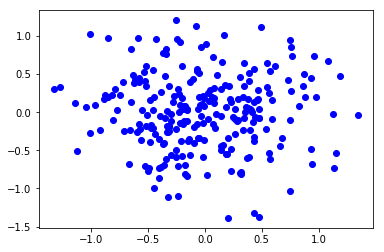

In [9]:
plt.plot(X[:, 0], X[:, 1], 'bo')

In [13]:
X, y = make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
               **blobs_params)

In [14]:
X.shape, y.shape

((250, 2), (250,))

In [16]:
pd.Series(y).value_counts()

1    125
0    125
dtype: int64

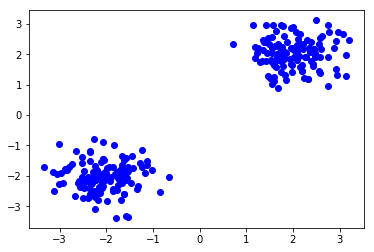

In [15]:
plt.plot(X[:, 0], X[:, 1], 'bo')

In [17]:
X, y = make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, 0.3],
               **blobs_params)

In [18]:
X.shape, y.shape

((250, 2), (250,))

In [19]:
pd.Series(y).value_counts()

1    125
0    125
dtype: int64

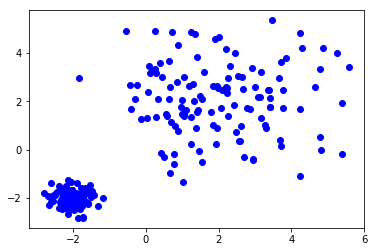

In [20]:
plt.plot(X[:, 0], X[:, 1], 'bo')